## 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

train = pd.read_csv('../../../../data/python_data/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
test = pd.read_csv('../../../../data/python_data/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [3]:
submit = pd.read_csv('../../../../data/python_data/house-prices-advanced-regression-techniques/sample_submission.csv', index_col='Id')
submit

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [4]:
data = train
print(train.shape, test.shape, submit.shape)

(1460, 80) (1459, 79) (1459, 1)


## 2. 데이터 분석하기

#### 타겟 변수 확인

<Axes: xlabel='SalePrice', ylabel='Density'>

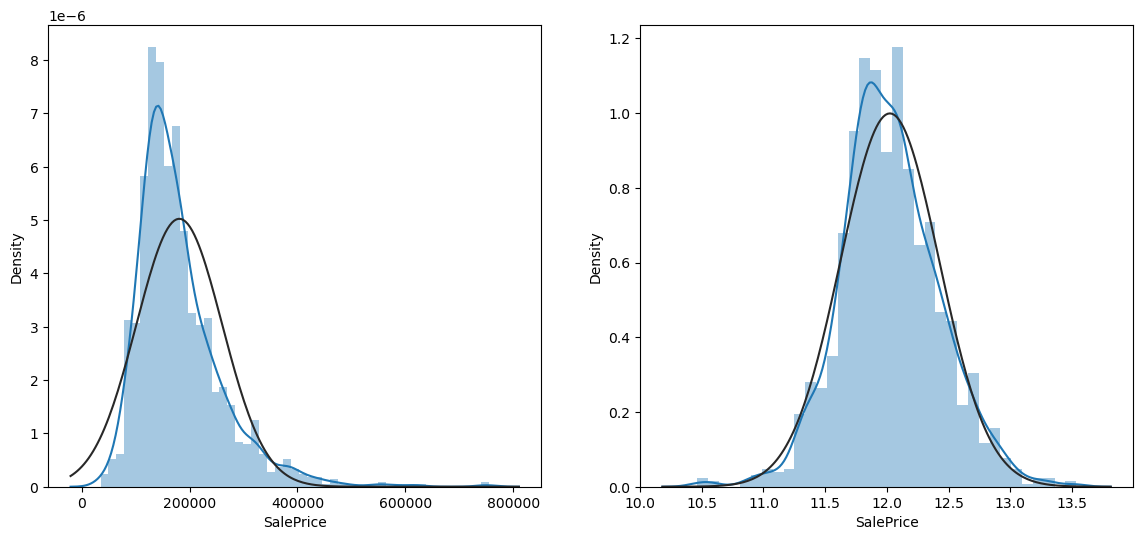

In [5]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(data['SalePrice'], fit=norm, ax=ax1)
sns.distplot(np.log(data['SalePrice']+1), fit=norm, ax=ax2)

왼쪽은 타겟 변수의 분포, 오른쪽은 타겟변수에 로그를 취한 분포 <br>
우측이 더 정규분포에 가까움<br>
<br>

로그를 취하면 비대칭도가 줄어들고, 정규분포에 가깝게 데이터가 분포되어 있는것을 확인 가능함. 로그를 취한 값을 타겟 변수로 주어서 예측하게끔 한 다음, 마지막에 제출할 때만 지수 계산을 해서 제출..

#### 변수간 상관관계 확인

<Axes: >

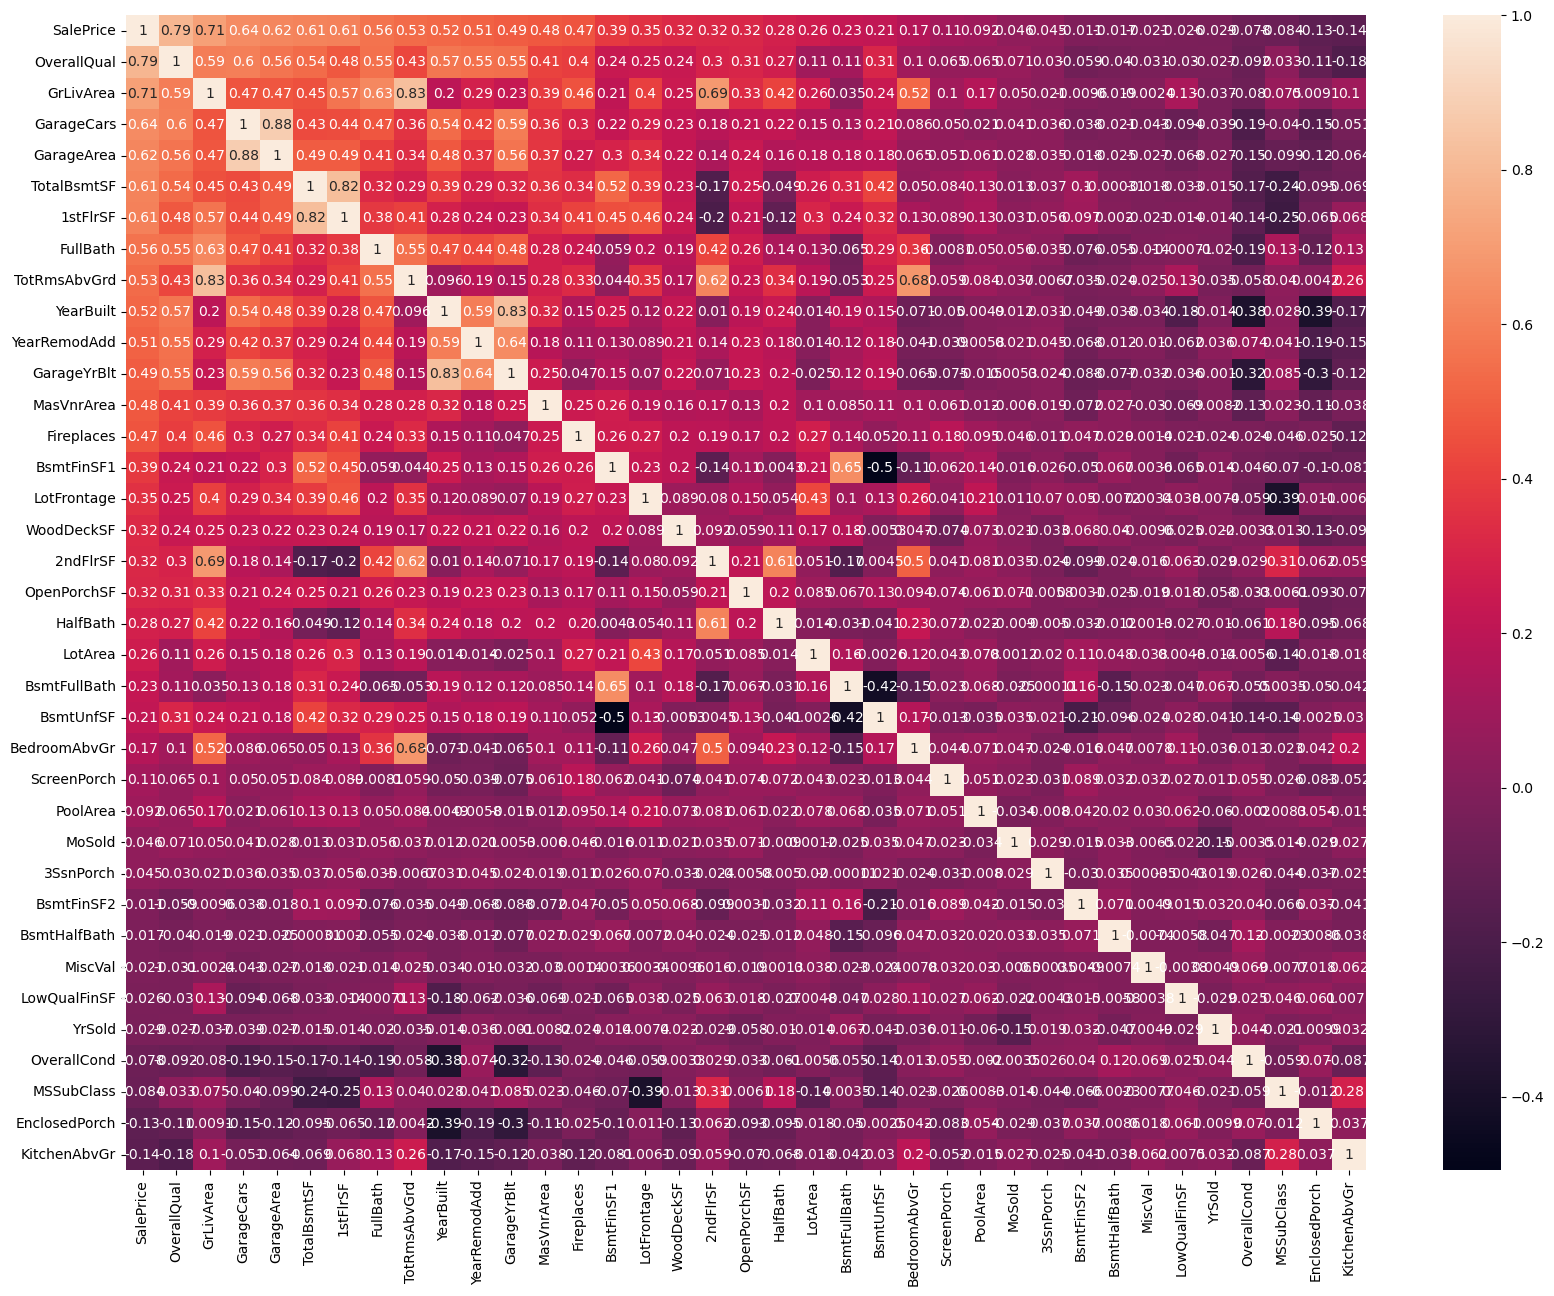

In [6]:
corr=data.corr()
top_corr=data[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

타겟 변수인 'SalePrice' 와 가장 큰 상관관계를 가진 40개의 변수를 표시하는 그래프

'OverallQual' 이라는 변수가 상관계수 0.79로 타겟변수와 가장 큰 상관관계를 가지고 있는 것으로 나타났다. <br>전반적으로 OverallQual 이 증가하면, 집값도 증가한다고 볼 수 있다는 뜻이다.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

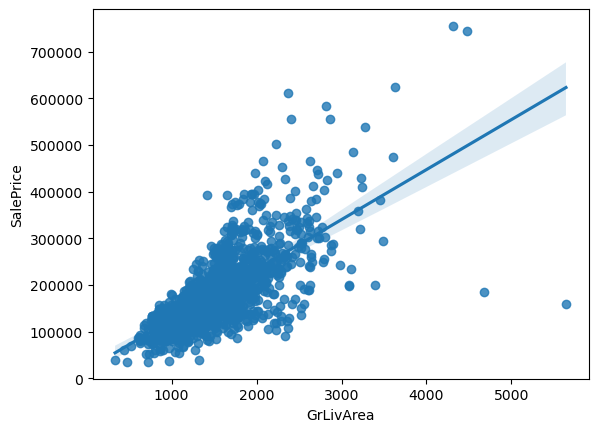

In [7]:
sns.regplot(x= data['GrLivArea'], y=data['SalePrice'])

두번째로 큰 상관계수를 가진 'GrLivArea'의 그래프

오른쪽 아래의 2개의 점은 이상치로 간주하고 삭제해 주는 것도 정확도를 높일 수 있는 방법 중 하나임

In [8]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

train과 test에 코드를 두 번 쓰지 않고, 합쳐서 all_data에 저장 후 이를 처리하고, 머신러닝에 학습시키기 전에 다시 분리

In [9]:
Ytrain=train['SalePrice']
train=train[list(test)]
all_data=pd.concat((train, test), axis=0)
print(all_data.shape)
Ytrain=np.log(Ytrain+1)

(2917, 79)


#### 전체 데이터에서 결측치 확인
data description.txt를 보면, 집에 해당 시설물이 없는 경우는 결측치로 처리되어 있음

In [10]:
cols=list(all_data)
# 반복문을 통해 해당 열에 결측치가 없으면 리스트에서 그 열의 이름을 지운다
# 결측치가 있는 변수 이름만 남아있음
for col in list(all_data):
    if (all_data[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(cols)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [11]:
# 1. 집에 해당 시설물이 없는 경우(범주형 변수)
# 'None'으로 채우기
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')
# 2. 집에 해당 시설물이 없는 경우(수치형 변수)
# 0으로 채우기(차고면적=0:차고 없음)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    all_data[col] = all_data[col].fillna(0)
# 해당 시설물이 없다고 보기 힘든 경우의 결측치
# 해당 열의 최빈값으로 채움(집에 외벽시설이 없을리 없고, 판매된 집의 거래 타입이 없을리 없다)
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [12]:
print(f"Total count of missing values in all_data : {all_data.isnull().sum().sum()}")

Total count of missing values in all_data : 0


#### 본격적인 데이터 분석(EDA) - 새로운 변수 만들기

**1) 총 가용 면적**

<Axes: ylabel='SalePrice'>

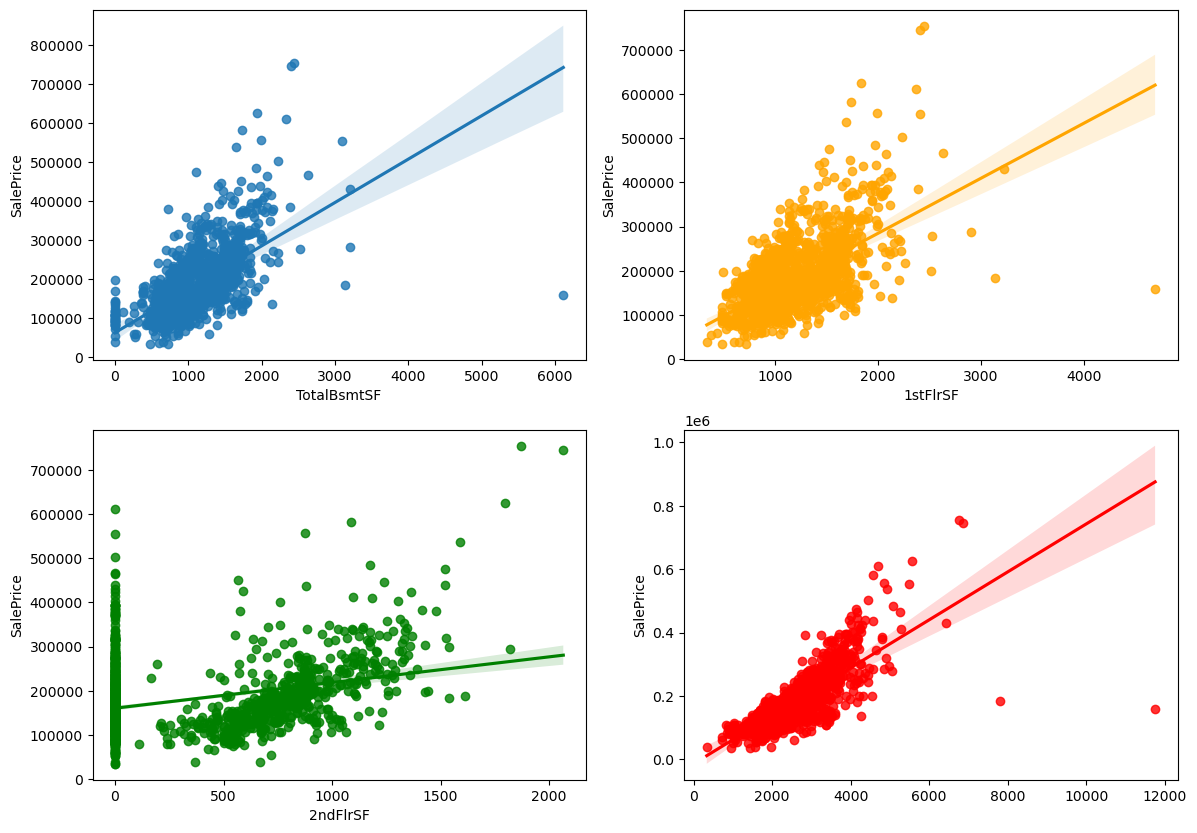

In [13]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.regplot(x = data['TotalBsmtSF'], y = data['SalePrice'], ax=ax1)
sns.regplot(x = data['1stFlrSF'], y = data['SalePrice'], color = 'orange', ax=ax2)
sns.regplot(x = data['2ndFlrSF'], y = data['SalePrice'], color = 'green', ax=ax3)
sns.regplot(x = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'], y = data['SalePrice'], color='red', ax=ax4)

지하실, 1층, 2층면적을 모두 합친 '총 면적'이라는 변수를 추가로 만듦.<br>
<br>
오른쪽 아래의 그래프가 나머지 3개를 합친 면적의 그래프인데, 이를 통해 총 면적이 증가하면 집값이 더 비싸진다는 결과를 얻을 수 있다 => 총 면적(TotalSF)<br>
추가로 'No2ndFlr'과 'NoBsmt'라는 변수를 통해 2층 없음, 지하실 없음 여부를 나타냄

In [14]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

**2) 총 욕실 수**

<Axes: ylabel='SalePrice'>

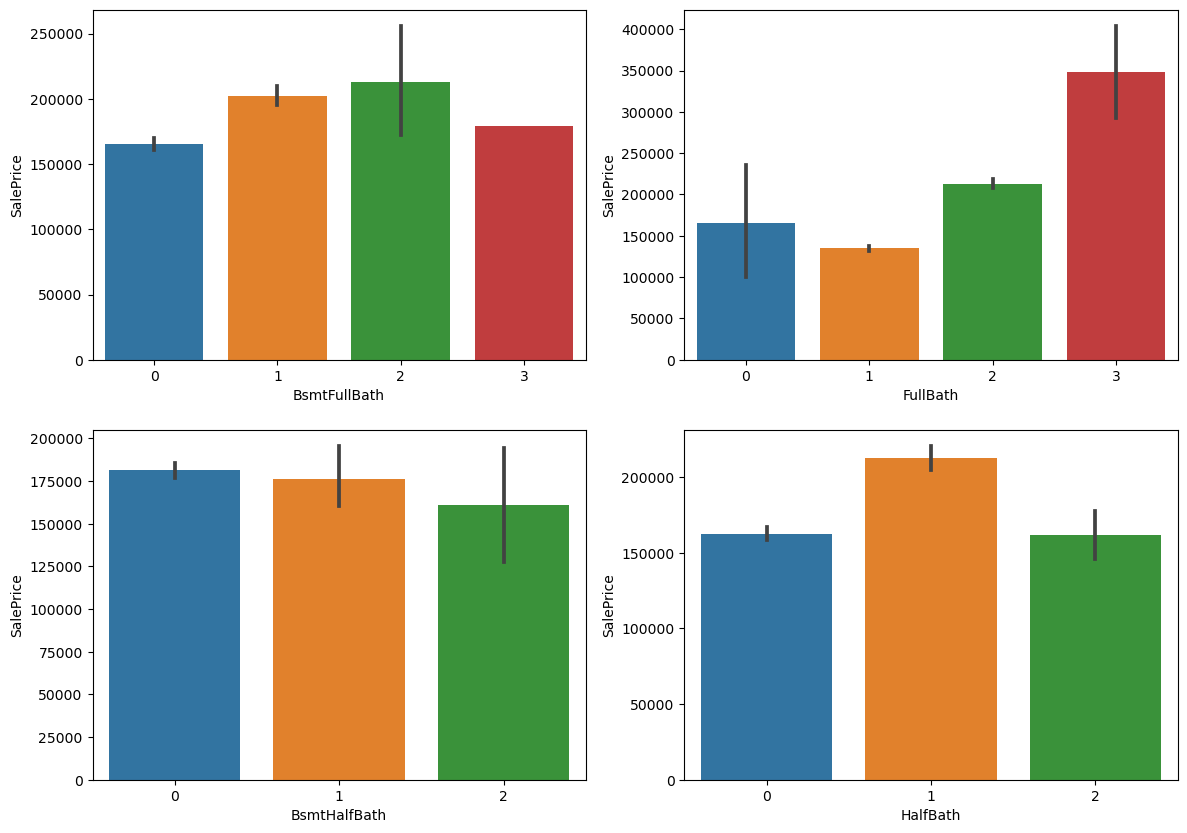

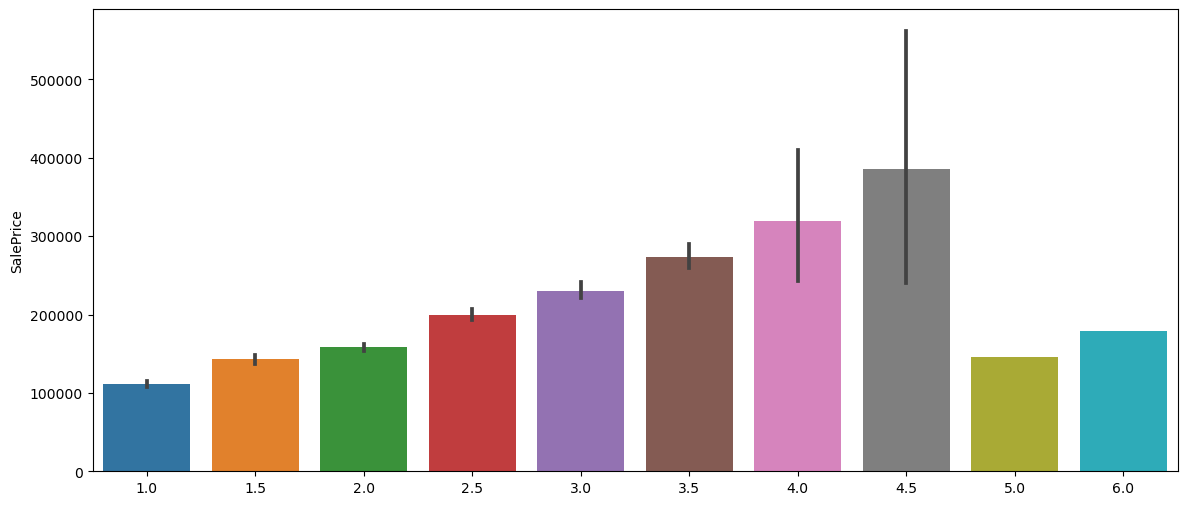

In [15]:
figure,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.barplot(x = data['BsmtFullBath'],y = data['SalePrice'],ax=ax1)
sns.barplot(x = data['FullBath'],y =data['SalePrice'],ax=ax2)
sns.barplot(x = data['BsmtHalfBath'],y = data['SalePrice'],ax=ax3)
sns.barplot(x = data['HalfBath'],y = data['SalePrice'],ax=ax4)

figure,(ax5) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(14,6)
sns.barplot(x = data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath']/2) + (data['HalfBath']/2), y = data['SalePrice'], ax=ax5)

욕실 갯수 = 'FullBath' 와 'HalfBath', 그리고 지하에 있는지 여부, 총 4개 열로 이루어져 있음 >> 마지막 그래프는 이들을 모두 더해 하나로 만들어봄<br>
<br>
==> 욕실 수가 더 많을수록 집값이 비싸짐을 확인할 수 있음<br>
<br>
마지막 그래프를 통해 욕실갯수가 5개 6개인 집은 각각 하나씩밖에 존재하지 않음을 확인(편차가 존재하지 않음) -> 이상치로 판단후 삭제

In [16]:
all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + (all_data['BsmtHalfBath']/2) + (all_data['HalfBath']/2)

**3) 건축연도 + 리모델링 연도**

<Axes: ylabel='SalePrice'>

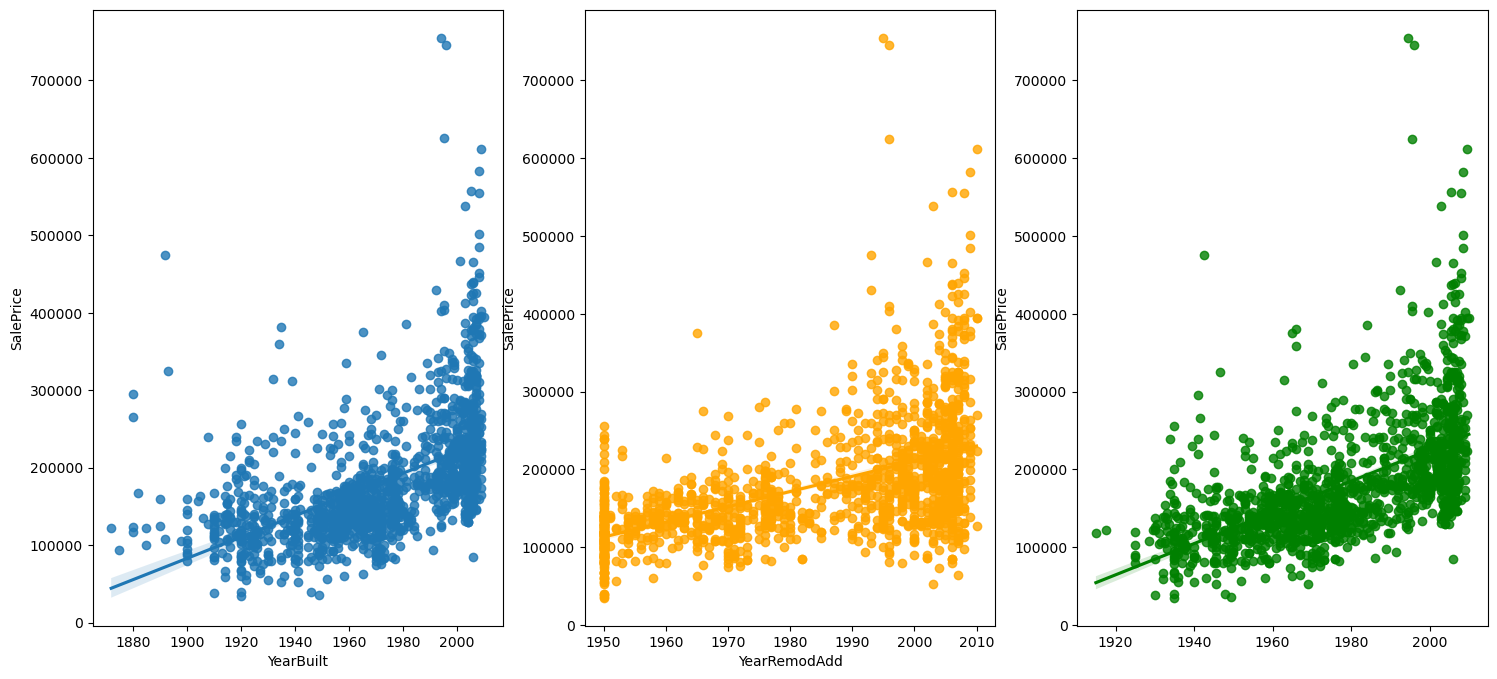

In [17]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
sns.regplot(x = data['YearBuilt'], y = data['SalePrice'], ax=ax1)
sns.regplot(x = data['YearRemodAdd'], y = data['SalePrice'], color = 'orange',ax=ax2)
sns.regplot(x = (data['YearBuilt']+data['YearRemodAdd'])/2, y = data['SalePrice'], color = 'green',ax=ax3) #'/2' for graph scaling

건축 연도, 리모델링 연도, 그 둘의 평균의 그래프

건축 연도가 오래 되었어도, 최근에 리모델링을 하면 값이 높게 나오고, 건축 이후 리모델링을 하지 않았다면 이 값은 아주 낮게 나옴<br>
<br>
이 값이 높은 집들은 '지어진지 얼마 되지 않은 신축 건물+최근 리모델링'에 가깝고, 낮은 집들은 '오래 건물+리모델링 안함'에 가까움 ==> 집값에 유의미한 영향(초록 그래프) ==> 변수 추가

In [18]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

#### 자료형 수정

'MSSubClass'는 숫자로 이루어져 있지만 각각의 숫자가 의미가 있는 범주형 변수이고, 판매 연,월도 연산 개념을 적용할 수 없으므로 문자열로 변경

In [19]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)

***시설물들을 종합적으로 판단하는 행위는 비슷할 것이기 때문에, 집의 시설물들을 묶어서 점수를 부여함***

#### 지하실 점수

In [20]:
# 지하실 관련 변수들을 묶어서 저장
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=all_data[Basement]

In [21]:
# 인코딩
# data description txt를 보고, 
# 순서대로 좋은 값에는 좋은 숫자, 안좋은 값에는 낮은 숫자
# 지하실이 없으면 0
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

'BsmtFinScore' 은 지하실의 완성도 점수, 'BsmtScore' 은 지하실의 종합 점수, 'BsmtDNF' 는 지하실의 미완성 여부를 나타내는 변수를 생성함

In [22]:
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore']=Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore']=Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

#### 토지 점수

In [23]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]
# 토지면적과 모양, 접근성 등을 고려할수 있는 점수 LotScore
Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

all_data['LotScore']=Lot['LotScore']

#### 차고 점수

In [24]:
# 차고 관련 변수들 묶어서 저장
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)

In [25]:
# 인코딩
# data description txt를 보고, 
# 순서대로 좋은 값에는 좋은 숫자, 안좋은 값에는 낮은 숫자
# 지하실이 없으면 0

Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

# GarageScore : 차고의 종합 점수 판단
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']

#### 기타 변수

**1) 비정상적으로 하나의 값만 많은 변수들 삭제**

In [26]:
all_data=all_data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating'])

**2) 비정상적으로 빈 값이 많은 변수들 삭제**

<Axes: xlabel='PoolQC', ylabel='SalePrice'>

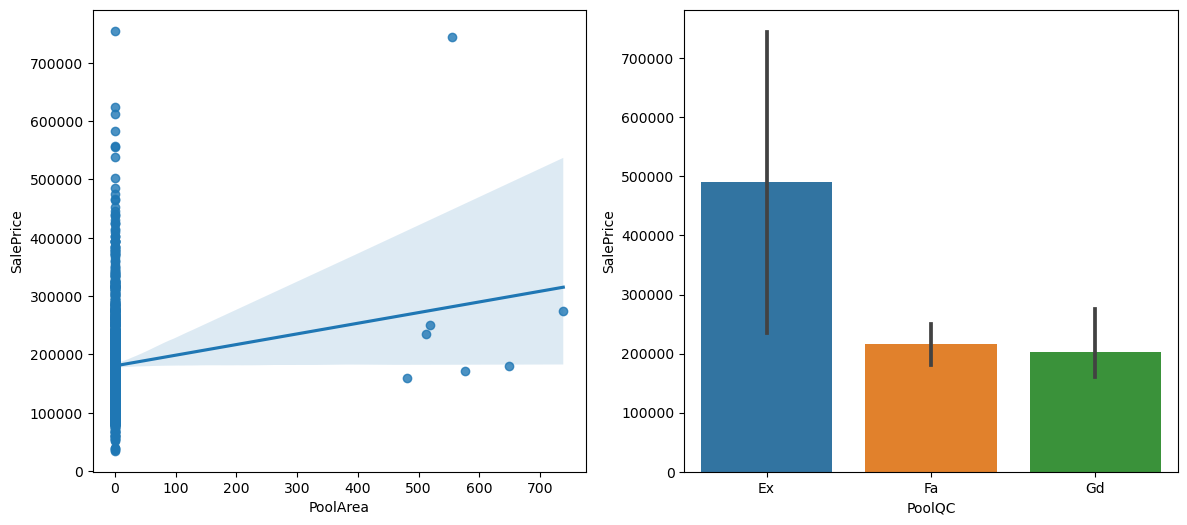

In [27]:
# 집에 수영장의 유무
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='PoolArea', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='PoolQC', y='SalePrice', ax=ax2)

In [28]:
all_data=all_data.drop(columns=['PoolArea','PoolQC'])

<Axes: xlabel='MiscFeature', ylabel='SalePrice'>

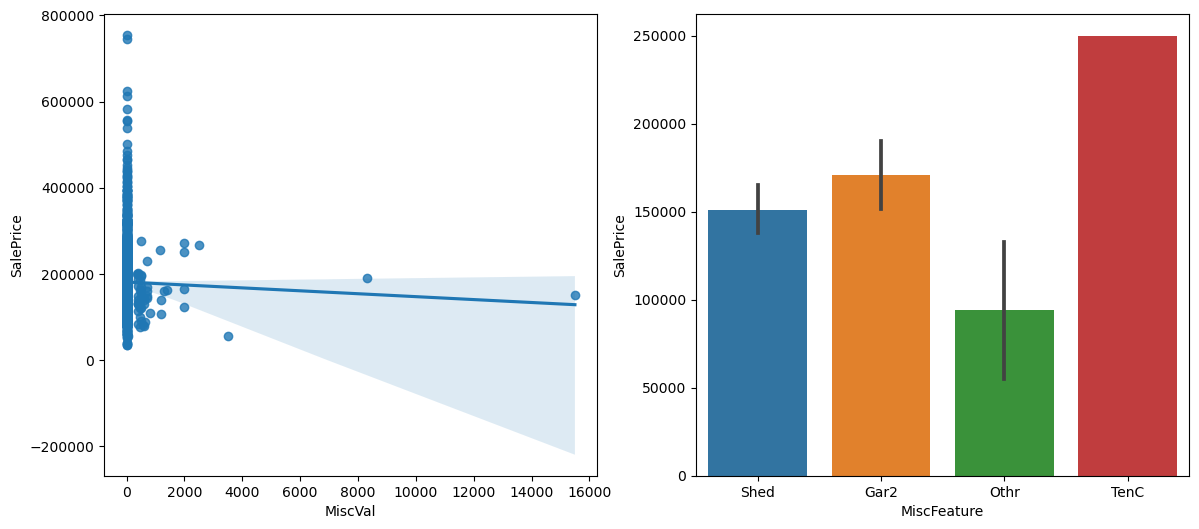

In [29]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='MiscVal', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='MiscFeature', y='SalePrice', ax=ax2)

In [30]:
all_data=all_data.drop(columns=['MiscVal','MiscFeature'])

**3) 위 둘보다는 낫지만 채워진 결측치가 많은 경우**

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

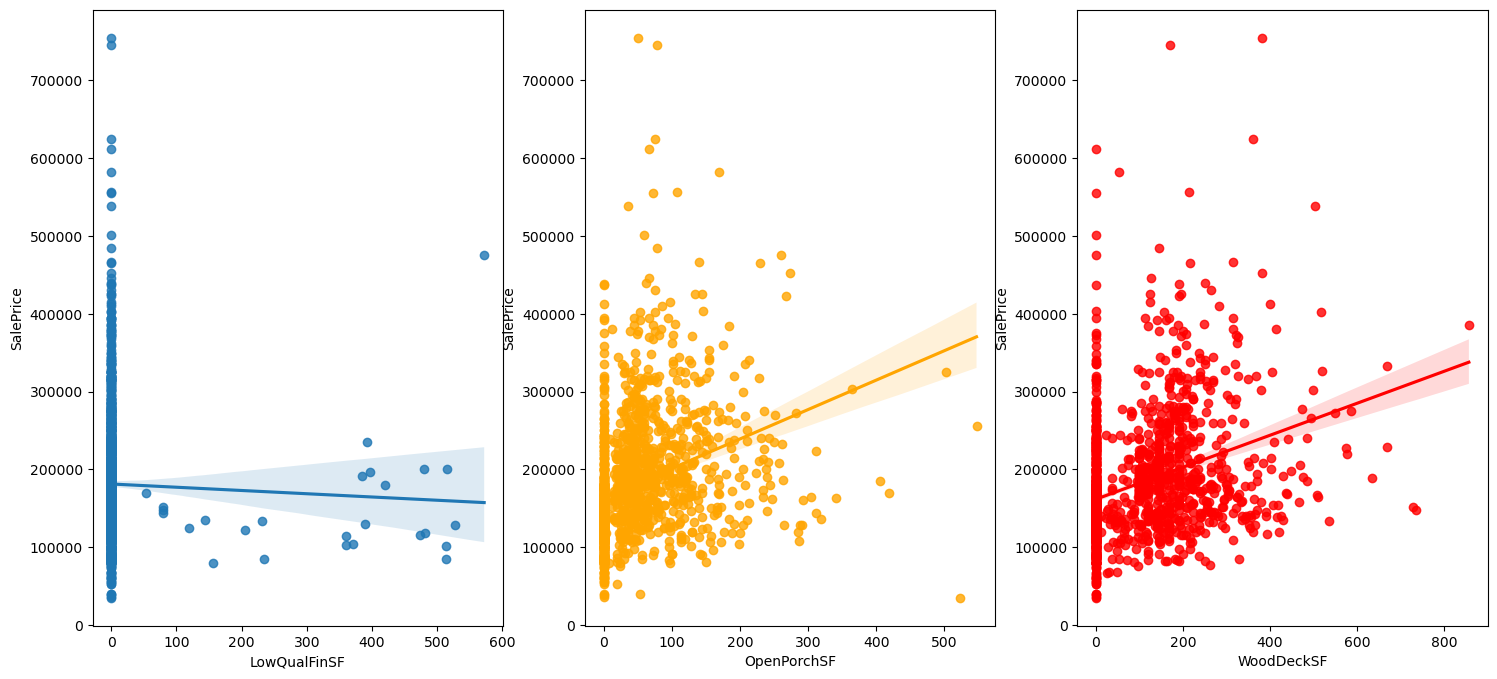

In [31]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
sns.regplot(data=data, x='LowQualFinSF', y='SalePrice',ax = ax1)
sns.regplot(data=data, x='OpenPorchSF', y='SalePrice',color = 'orange', ax = ax2)
sns.regplot(data=data, x='WoodDeckSF', y='SalePrice',color = 'red', ax = ax3)

0만 분리해주면 괜찮을 듯 하여 분리 진행

In [32]:
all_data['NoLowQual']=(all_data['LowQualFinSF']==0)
all_data['NoOpenPorch']=(all_data['OpenPorchSF']==0)
all_data['NoWoodDeck']=(all_data['WoodDeckSF']==0)

## 3. 전처리

#### 범주형 변수

In [33]:
# 우선 모두 원-핫 인코딩 진행
# import numpy as np
non_numeric=all_data.select_dtypes(object)

def onehot(col_list):
    global all_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)
    
onehot(list(non_numeric))

(2917, 309)


#### 수치형 변수

In [34]:
# 비대칭이 너무 심해지지 않도록 로그를 씌워 적절히 변형
numeric=all_data.select_dtypes(np.number)

def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col]=np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(all_data.shape)

log_transform(list(numeric))

255 features had been tranformed
(2917, 309)


전처리까지 완료<br>
all_data 항목을 test갯수에 맞게 잘라서 저장

In [35]:
print(train.shape, test.shape)
Xtrain=all_data[:len(train)]
Xtest=all_data[len(train):]
print(Xtrain.shape, Xtest.shape)
# 원래 train 데이터의 갯수와 데이터를 가공한 Xtrain의 갯수가 1458개로 동일함

(1458, 79) (1459, 79)
(1458, 309) (1459, 309)


# 4. 머신러닝 모델로 학습

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 70.9/70.9 MB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 404.2/404.2 kB 6.4 MB/s eta 0:00:00
     ------------------------------------- 225.4/225.4 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [38]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import xgboost
from xgboost import XGBRegressor
import time
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Lasso, ElasticNet, sklearn의 GradientBoosting, XGBoost 4개의 모델을 불러와서 저장 <br>
최종 예측 결과물은 이 4개의 모델의 예측값의 평균값을 사용해 제출. 

In [39]:
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                         min_samples_split=10, loss='huber', random_state=18)

model_XGB=XGBRegressor(colsample_bylevel=0.9229733609038979,colsample_bynode=0.21481791874780318,colsample_bytree=0.607964318297635, 
                       gamma=0.8989889254961725, learning_rate=0.009192310189734834, max_depth=3, n_estimators=3602, 
                       reg_alpha=3.185674564163364e-12,reg_lambda=4.95553539265423e-13, seed=18, subsample=0.8381904293270576,
                       tree_method='gpu_hist',verbosity=0)

In [42]:
XGBRegressor(tree_method='gpu_hist', gpu_id=0)

model_Lasso.fit(Xtrain, Ytrain)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, Ytrain)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

model_XGB.fit(Xtrain, Ytrain)
XGB_predictions=model_XGB.predict(Xtest)
train_XGB=model_XGB.predict(Xtrain)

model_GBoost.fit(Xtrain, Ytrain)
GBoost_predictions=model_GBoost.predict(Xtest)
train_GBoost=model_GBoost.predict(Xtrain)

log_train_predictions = (train_Lasso + train_ENet + train_XGB + train_GBoost)/4
train_score=np.sqrt(mean_squared_error(Ytrain, log_train_predictions))
print(f"Scoring with train data : {train_score}")

log_predictions=(Lasso_predictions + ENet_predictions + XGB_predictions + GBoost_predictions) / 4
predictions=np.exp(log_predictions)-1
submit['SalePrice']=predictions
submit.to_csv('Result.csv')

XGBoostError: [10:27:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [ ]:
submit

# 5. 딥러닝 모델로 학습

In [43]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [46]:
# 로그 취해진 것 다시 원래대로 돌려놓기
Ytrain = np.exp(Ytrain) - 1
Ytrain

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1458, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.2)

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import mean_squared_error


def root_mean_squared_error(y_true,y_pred):
    return tf.sqrt(mean_squared_error(y_true,y_pred))

In [50]:
model = Sequential()
model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(30,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam',loss=root_mean_squared_error)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                3100      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4711 (18.40 KB)
Trainable params: 4711 (18

In [51]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)
modelpath = './model/house_predict.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, model='val_loss',verbose=0,save_best_only=True)

In [52]:
import numpy as np

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [53]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=500,
                   batch_size =32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/500
28/28 [==============================] - 1s 14ms/step - loss: 181398.3750 - val_loss: 182923.4219
Epoch 2/500
28/28 [==============================] - 0s 7ms/step - loss: 179830.0156 - val_loss: 180221.4688
Epoch 3/500
28/28 [==============================] - 0s 7ms/step - loss: 174331.3281 - val_loss: 170567.2188
Epoch 4/500
28/28 [==============================] - 0s 6ms/step - loss: 155906.0312 - val_loss: 139750.5312
Epoch 5/500
28/28 [==============================] - 0s 5ms/step - loss: 106003.8984 - val_loss: 70920.8281
Epoch 6/500
28/28 [==============================] - 0s 5ms/step - loss: 66868.2578 - val_loss: 56806.4297
Epoch 7/500
28/28 [==============================] - 0s 4ms/step - loss: 63602.3125 - val_loss: 57091.5938
Epoch 8/500
28/28 [==============================] - 0s 4ms/step - loss: 63403.3008 - val_loss: 57102.3555
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 64062.7266 - val_loss: 57173.8984
Epoch 10/500
28/28 [=======

In [54]:
non_float32_columns = Xtest.dtypes[Xtest.dtypes != 'float32']
print(non_float32_columns)

LotFrontage              float64
LotArea                  float64
OverallQual                int64
OverallCond              float64
YearBuilt                  int64
                          ...   
SaleCondition_AdjLand    float16
SaleCondition_Alloca     float16
SaleCondition_Family     float16
SaleCondition_Normal       uint8
SaleCondition_Partial    float16
Length: 309, dtype: object


In [66]:
Xtest = Xtest.astype(np.float32)
pred = model.predict(Xtest)

46/46 [==============================] - 0s 1ms/step


In [67]:
submit1 = pd.read_csv('../../../../data/python_data/house-prices-advanced-regression-techniques/sample_submission.csv', index_col='Id')
submit1

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [68]:
submit1['SalePrice']=pred

In [69]:
submit1

,SalePrice
Id,
1461,136225.484375
1462,122320.226562
1463,130470.648438
1464,130471.179688
1465,130062.757812
...,...
2915,85499.171875
2916,120237.835938
2917,133365.578125


In [70]:
submit

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [71]:
submit1.to_csv('Result1.csv')